<a href="https://colab.research.google.com/github/spch88/my_project/blob/main/%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_%D0%B7%D0%B0%D0%B1%D0%BE%D0%BB%D0%B5%D0%B2%D0%B0%D0%BD%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Самостоятельно напишите нейронную сеть, которая поможет распознавать болезни по симптомам. Используя подготовленную базу, создайте и обучите нейронную сеть, распознающую десять категорий 
заболеваний: аппендицит, гастрит, гепатит, дуоденит, колит, панкреатит, холицестит, эзофагит, энтерит, язва. Добейтесь правильного распознавания 6 и более заболеваний

Сразу обратим внимание датасет небольшой и хороших результатов добится  сложно.

Ссылка на датасет:https://storage.googleapis.com/datasets_ai/Data/diseases.zip

In [ ]:
# Работа с массивами данных
import numpy as np 

# Функции-утилиты для работы с категориальными данными
from tensorflow.keras import utils

# Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D

# Токенизатор для преобразование текстов в последовательности
from tensorflow.keras.preprocessing.text import Tokenizer

# Рисование схемы модели
from tensorflow.keras.utils import plot_model

# Матрица ошибок классификатора
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Загрузка датасетов из облака google
import gdown

# Функции операционной системы
import os

# Работа со временем
import time

# Регулярные выражения
import re

# Отрисовка графиков
import matplotlib.pyplot as plt

# Вывод объектов в ячейке colab
from IPython.display import display

%matplotlib inline

In [ ]:
# Скачаем архив с симптомами болезней
import gdown
gdown.download('https://storage.googleapis.com/datasets_ai/Data/diseases.zip', None, quiet=True)

'diseases.zip'

In [ ]:
# Распакум архив
!unzip -o diseases.zip

Archive:  diseases.zip
   creating: dis/
  inflating: dis/Аппендицит.txt  
  inflating: dis/Гастрит.txt  
  inflating: dis/Гепатит.txt  
  inflating: dis/Дуоденит.txt  
  inflating: dis/Колит.txt      
  inflating: dis/Панкреатит.txt  
  inflating: dis/Холицестит.txt  
  inflating: dis/Эзофагит.txt  
  inflating: dis/Энтерит.txt  
  inflating: dis/Язва.txt        


In [ ]:
FILE_DIR  = 'dis/'                     # Папка с текстовыми файлами

In [ ]:
# Подготовим пустые списки

CLASS_LIST = []  # Список классов 
text_train = []  # Список для оучающей выборки
text_test = []   # Список для тестовой выборки

# Зададим коэффициент разделения текста на обучающую и текстовую выборки
split_coef = 0.8

# Получим списки файлов в папке
file_list = os.listdir(FILE_DIR)

for file_name in file_list:
    m = file_name.split('.') # Разделим имя файла и расширение
    class_name = m[0]        # Из имени файла получим название класса
    ext = m[1]               # Выделим расширение файла                       

    if ext=='txt':                                         # Если расширение txt то берем файл в работу    
        if class_name not in CLASS_LIST:                   # Проверим, есть уже такой класс в списке
            print(f'Добавление класса "{class_name}"')     # Выведем имя нового класса
            CLASS_LIST.append(class_name)                  # Добавим новый класс в списоккласса "{class_name}"')

        cls = CLASS_LIST.index(class_name)                                        # Получим индекс (номер) нового класса
        print(f'Добавление файла "{file_name}" в класс "{CLASS_LIST[cls]}"')      # Сообщим о появлении нового класса

        with open(f'{FILE_DIR}/{file_name}', 'r') as f: # Откроем файл на чтение
            text = f.read()                                                       # Загрузка содержимого файла в строку
            text = text.replace('\n', ' ').split(' ')                             # Уберем символы перевода строк, получим список слов
            text_len=len(text)                                                    # Найдем количество прочитанных слов
            text_train.append(' '.join(text[:int(text_len*split_coef)]))          # Выделим часть файла в обучающую выборку
            text_test.append(' '.join(text[int(text_len*split_coef):]))           # Выделим часть файла в тестовую выборку



Добавление класса "Язва"
Добавление файла "Язва.txt" в класс "Язва"
Добавление класса "Панкреатит"
Добавление файла "Панкреатит.txt" в класс "Панкреатит"
Добавление класса "Гастрит"
Добавление файла "Гастрит.txt" в класс "Гастрит"
Добавление класса "Аппендицит"
Добавление файла "Аппендицит.txt" в класс "Аппендицит"
Добавление класса "Гепатит"
Добавление файла "Гепатит.txt" в класс "Гепатит"
Добавление класса "Дуоденит"
Добавление файла "Дуоденит.txt" в класс "Дуоденит"
Добавление класса "Эзофагит"
Добавление файла "Эзофагит.txt" в класс "Эзофагит"
Добавление класса "Колит"
Добавление файла "Колит.txt" в класс "Колит"
Добавление класса "Энтерит"
Добавление файла "Энтерит.txt" в класс "Энтерит"
Добавление класса "Холицестит"
Добавление файла "Холицестит.txt" в класс "Холицестит"


In [ ]:
# Найдем получившееся количество классов
CLASS_COUNT = len(CLASS_LIST) 

In [ ]:
# Выведем число получившихся классов
print(CLASS_COUNT)

10


In [ ]:
# Проверим загрузки: выведем начальные отрывки из каждого класса

for cls in range(CLASS_COUNT):             # Запустим цикл по числу классов
    print(f'Класс: {CLASS_LIST[cls]}')     # Выведем имя класса
    print(f'  train: {text_train[cls]}')   # Выведем фрагмент обучающей выборки
    print(f'  test : {text_test[cls]}')    # Выведем фрагмент тестовой выборки
    print()

Класс: Язва
  train: боль, часто локализованная в эпигастрии и уменьшающаяся после еды или антацидов.  боль описывается как жгучая или грызущая, иногда как чувство голода.  Боль в эпигастральной области кислая отрыжка  изжога снижение массы тела рвота и тошнота после еды  боль после еды и в зависимости от пораженного отдела может появиться сразу или спустя 1–2 часа рвота кислым содержимым желудка  боль в животе Боль возникает в середине живота («под ложечкой»), никуда, как правило, не отдает Болевой синдром. Возникает в верхней части живота, носит непостоянный характер.  Изжога Рвота тошнота Отсутствие аппетита  жжениеи  боль в верхней части живота выше пупка тошнота рвота снижение аппетита снижение веса слабость усталость  налет на языке метеоризм чередование поноса ,запора и нормального стула неприятный запах из ротовой полости уменьшение веса тошнота рвота изжога и отрыжка кислотой  Ноющие или схваткообразные боли, слабоинтенсивные в эпигастральной области, чаще возникают натощак ил

In [ ]:
# Контекстный менеджер для измерения времени операций
# Операция обертывается менеджером с помощью оператора with

class timex:
    def __enter__(self):
        # Фиксация времени старта процесса
        self.t = time.time()
        return self

    def __exit__(self, type, value, traceback):
        # Вывод времени работы
        print('Время обработки: {:.2f} с'.format(time.time() - self.t))

Решение:

In [ ]:
# подготовим сервисные функции

# Функция разбиения последовательности на отрезки скользящим окном
# На входе - последовательность индексов, размер окна, шаг окна
def split_sequence(sequence, win_size, hop):
    # Последовательность разбивается на части до последнего полного окна
    return [sequence[i:i + win_size] for i in range(0, len(sequence) - win_size + 1, hop)]


# Функция формирования выборок из последовательностей индексов
# формирует выборку отрезков и соответствующих им меток классов в виде one hot encoding
def vectorize_sequence(seq_list, win_size, hop):
    # В списке последовательности следуют в порядке их классов
    # Всего последовательностей в списке ровно столько, сколько классов
    class_count = len(seq_list)

    # Списки для исходных векторов и категориальных меток класса
    x, y = [], []

    # Для каждого класса:
    for cls in range(class_count):
        # Разбиение последовательности класса cls на отрезки
        vectors = split_sequence(seq_list[cls], win_size, hop)
        # Добавление отрезков в выборку
        x += vectors
        # Для всех отрезков класса cls добавление меток класса в виде OHE
        y += [utils.to_categorical(cls, class_count)] * len(vectors)

    # Возврат результатов как numpy-массивов
    return np.array(x), np.array(y)

# Функция компиляции и обучения модели нейронной сети
def compile_train_model(model, 
                        x_train,
                        y_train,
                        x_val,
                        y_val,
                        optimizer='adam',
                        epochs=50,
                        batch_size=128,
                        figsize=(20, 5)):

    # Компиляция модели
    model.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

    # Вывод сводки
    model.summary()

    # Обучение модели с заданными параметрами
    history = model.fit(x_train,
                        y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(x_val, y_val),
                        verbose=1)
    
    # Вывод графиков точности и ошибки
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle('График процесса обучения модели')
    ax1.plot(history.history['accuracy'], 
               label='Доля верных ответов на обучающем наборе')
    ax1.plot(history.history['val_accuracy'], 
               label='Доля верных ответов на проверочном наборе')
    ax1.xaxis.get_major_locator().set_params(integer=True)
    ax1.set_xlabel('Эпоха обучения')
    ax1.set_ylabel('Доля верных ответов')
    ax1.legend()

    ax2.plot(history.history['loss'], 
               label='Ошибка на обучающем наборе')
    ax2.plot(history.history['val_loss'], 
               label='Ошибка на проверочном наборе')
    ax2.xaxis.get_major_locator().set_params(integer=True)
    ax2.set_xlabel('Эпоха обучения')
    ax2.set_ylabel('Ошибка')
    ax2.legend()
    plt.show()


# Функция вывода результатов оценки модели на заданных данных
def eval_model(model, x, y_true,
               class_labels=[],
               cm_round=3,
               title='',
               figsize=(10, 10)):
    # Вычисление предсказания сети
    y_pred = model.predict(x)
    # Построение матрицы ошибок
    cm = confusion_matrix(np.argmax(y_true, axis=1),
                          np.argmax(y_pred, axis=1),
                          normalize='true')
    # Округление значений матрицы ошибок
    cm = np.around(cm, cm_round)

    # Отрисовка матрицы ошибок
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(f'Матрица ошибок нормализованная', fontsize=18)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=ax)
    plt.gca().images[-1].colorbar.remove()  # Стирание ненужной цветовой шкалы
    plt.xlabel('Предсказанные классы', fontsize=16)
    plt.ylabel('Верные классы', fontsize=16)
    fig.autofmt_xdate(rotation=45)          # Наклон меток горизонтальной оси при необходимости
    plt.show()    

    print('-'*100)

    # Для каждого класса:
    for cls in range(len(class_labels)):
        # Определяется индекс класса с максимальным значением предсказания (уверенности)
        cls_pred = np.argmax(cm[cls])
        # Формируется сообщение о верности или неверности предсказания
        msg = 'ВЕРНО :-)' if cls_pred == cls else 'НЕВЕРНО :-('
        # Выводится текстовая информация о предсказанном классе и значении уверенности
        print('Класс: {:<20} {:3.0f}% сеть отнесла к классу {:<20} - {}'.format(class_labels[cls],
                                                                               100. * cm[cls, cls_pred],
                                                                               class_labels[cls_pred],
                                                                               msg))

    # Средняя точность распознавания определяется как среднее диагональных элементов матрицы ошибок
    print('\nСредняя точность распознавания: {:3.0f}%'.format(100. * cm.diagonal().mean()))


# Совместная функция обучения и оценки модели нейронной сети
def compile_train_eval_model(model, 
                             x_train,
                             y_train,
                             x_test,
                             y_test,
                             class_labels=CLASS_LIST,
                             title='',
                             optimizer='adam',
                             epochs=50,
                             batch_size=128,
                             graph_size=(20, 5),
                             cm_size=(10, 10)):

    # Компиляция и обучение модели на заданных параметрах
    # В качестве проверочных используются тестовые данные
    compile_train_model(model, 
                        x_train, y_train,
                        x_test, y_test,
                        optimizer=optimizer,
                        epochs=epochs,
                        batch_size=batch_size,
                        figsize=graph_size)

    # Вывод результатов оценки работы модели на тестовых данных
    eval_model(model, x_test, y_test, 
               class_labels=class_labels, 
               title=title,
               figsize=cm_size)
    
def print_text_stats(title, texts, sequences, class_labels=CLASS_LIST):
    # Суммарное количество символов и слов в тексте
    chars = 0
    words = 0

    print(f'Статистика по {title} текстам:')

    # Вывод итогов по всем классам данного набора текстов и их последовательностей индексов
    for cls in range(len(class_labels)):
        print('{:<15} {:9} символов,{:8} слов'.format(class_labels[cls],
                                                      len(texts[cls]),
                                                      len(sequences[cls])))
        chars += len(texts[cls])
        words += len(sequences[cls])

    print('----')
    print('{:<15} {:9} символов,{:8} слов\n'.format('В сумме', chars, words))

В результате проведения ряда экспериментов были получены следующие результаты:

In [ ]:
# Установка параметров обучения
VOCAB_SIZE = 6000                         # Объем словаря для токенизатора
WIN_SIZE   = 80                           # Длина отрезка текста (окна) в словах
WIN_HOP    = 10                           # Шаг окна разбиения текста на векторы

# Токенизация
with timex():
    tokenizer = Tokenizer(num_words=VOCAB_SIZE, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)

# Построение частотного словаря по обучающим текстам
    tokenizer.fit_on_texts(text_train)
    
# Преобразуем обучающие и проверочные тексты в последовательности индексов согласно частотному словарю 
    seq_train = tokenizer.texts_to_sequences(text_train)
    seq_test = tokenizer.texts_to_sequences(text_test)

# Вывод статистических итогов по текстам
    print_text_stats('обучающим', text_train, seq_train)
    print_text_stats('тестовым', text_test, seq_test)    

Статистика по обучающим текстам:
Язва                 2728 символов,     376 слов
Панкреатит           9217 символов,    1183 слов
Гастрит              5440 символов,     660 слов
Аппендицит           3257 символов,     471 слов
Гепатит              4385 символов,     555 слов
Дуоденит             3186 символов,     393 слов
Эзофагит             4647 символов,     639 слов
Колит                7262 символов,     950 слов
Энтерит              5151 символов,     662 слов
Холицестит           4951 символов,     675 слов
----
В сумме             50224 символов,    6564 слов

Статистика по тестовым текстам:
Язва                  731 символов,      96 слов
Панкреатит           2095 символов,     297 слов
Гастрит              1276 символов,     179 слов
Аппендицит            817 символов,     108 слов
Гепатит              1137 символов,     132 слов
Дуоденит              754 символов,      95 слов
Эзофагит             1219 символов,     154 слов
Колит                1864 символов,     242 сло

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_49 (Embedding)    (None, 80, 30)            180000    
                                                                 
 spatial_dropout1d_49 (Spati  (None, 80, 30)           0         
 alDropout1D)                                                    
                                                                 
 batch_normalization_50 (Bat  (None, 80, 30)           120       
 chNormalization)                                                
                                                                 
 gru_43 (GRU)                (None, 40)                8640      
                                                                 
 dense_51 (Dense)            (None, 10)                410       
                                                                 
Total params: 189,170
Trainable params: 189,110
Non-t

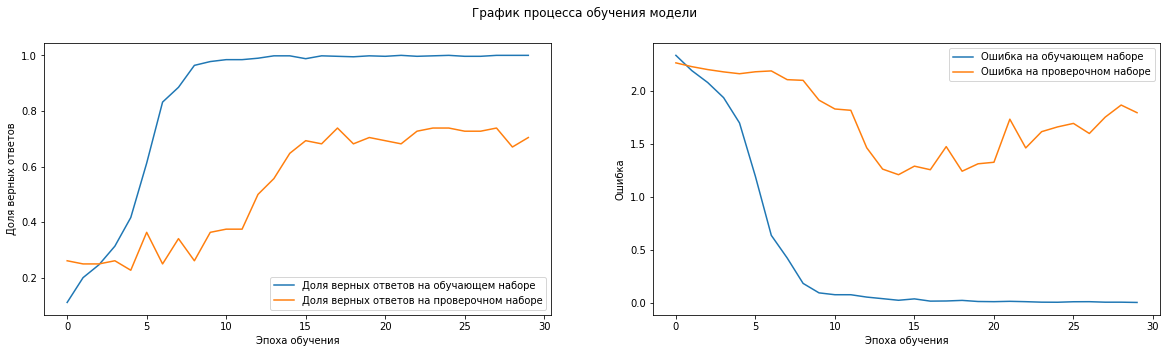

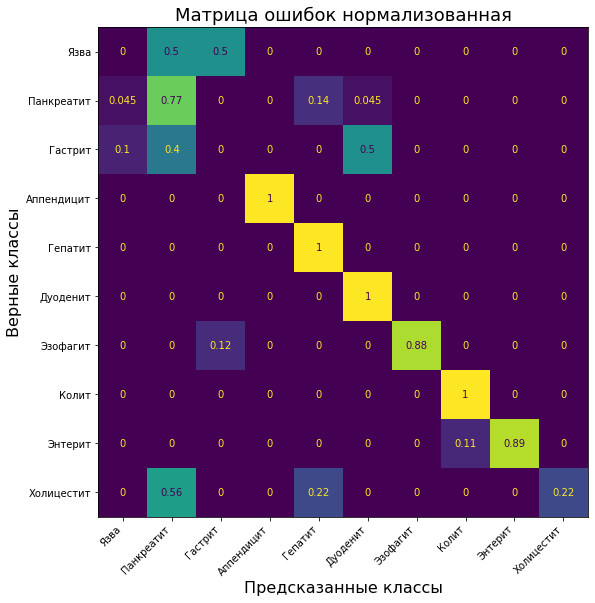

----------------------------------------------------------------------------------------------------
Класс: Язва                  50% сеть отнесла к классу Панкреатит           - НЕВЕРНО :-(
Класс: Панкреатит            77% сеть отнесла к классу Панкреатит           - ВЕРНО :-)
Класс: Гастрит               50% сеть отнесла к классу Дуоденит             - НЕВЕРНО :-(
Класс: Аппендицит           100% сеть отнесла к классу Аппендицит           - ВЕРНО :-)
Класс: Гепатит              100% сеть отнесла к классу Гепатит              - ВЕРНО :-)
Класс: Дуоденит             100% сеть отнесла к классу Дуоденит             - ВЕРНО :-)
Класс: Эзофагит              88% сеть отнесла к классу Эзофагит             - ВЕРНО :-)
Класс: Колит                100% сеть отнесла к классу Колит                - ВЕРНО :-)
Класс: Энтерит               89% сеть отнесла к классу Энтерит              - ВЕРНО :-)
Класс: Холицестит            56% сеть отнесла к классу Панкреатит           - НЕВЕРНО :-(

Средняя точн

In [ ]:
# Формирование обучающей выборки
x_train, y_train = vectorize_sequence(seq_train, WIN_SIZE, WIN_HOP) 
# Формирование тестовой выборки
x_test, y_test = vectorize_sequence(seq_test, WIN_SIZE, WIN_HOP)

# Создание модели НС, обучение и получение результатов
model = Sequential()
model.add(Embedding(VOCAB_SIZE, 30, input_length=WIN_SIZE))
model.add(SpatialDropout1D(0.3))
model.add(BatchNormalization())
# Рекуррентный слой GRU
model.add(GRU(40, dropout=0.2, recurrent_dropout=0.2, activation='relu'))
model.add(Dense(CLASS_COUNT, activation='softmax'))

eval_mean = compile_train_eval_model(model,
                         x_train, y_train,
                         x_test, y_test,
                         optimizer='adam',
                         epochs=30,
                         batch_size=15,
                         class_labels=CLASS_LIST)